In [1]:
####################
# Prep 1 basic imports functions/methods
####################
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

import re, string, unicodedata
# import contractions
# import inflect

import matplotlib
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import gc
import nltk
from nltk.corpus import stopwords

import os
basepath = "C:/U of A Fort Smith/My BS Science Degree/2025-01 CS4333 Machine Learning/MLFP_DataAnalysis_and_DataPrep Tony/"
# basepath = "R:/2025-01 CS4333 Machine Learning/MLFP_DataAnalysis_and_DataPrep Tony/"

def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)
 
def processDF (filename):
    # print (filename)
    fileUse = os.path.join(basepath, filename)
    df = pd.read_csv(fileUse)
    df["Review_text"] = df["Review_text"].astype(str).apply(remove_stop_words)
    df["Review_text"] = df["Review_text"].str.replace("[^a-z^']", " ", regex= True)
    return df

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words
    

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

#remove all punctuation
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words


def normalize(words):
    words = remove_non_ascii(words)
    #words = to_lowercase(words)
    words = remove_punctuation(words)
    #words = replace_numbers(words)
    return words

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\JoeAtHome\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JoeAtHome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
####################
# Prep 2 Prep all dataframes @ 6-8 minutes+
####################
df1 = processDF("data_set_1.csv")
df2 = processDF("data_set_2.csv")
df3 = processDF("data_set_3.csv")
df4 = processDF("data_set_4.csv")

In [4]:
####################
# Analyze dataframe sizes - if desired
####################
print(f"df1 records: {len(df1):,}")
print(f"df2 records: {len(df2):,}")
print(f"df3 records: {len(df3):,}")
print(f"df4 records: {len(df4):,}")

print(f"df2/df1 records: {(len(df2)/len(df1)):,.3f}")
print(f"df1/df2 records: {(len(df1)/len(df2)):,.3f}")
print(f"df3/df1 records: {(len(df3)/len(df1)):,.3f}")
print(f"df1/df3 records: {(len(df1)/len(df3)):,.3f}")
print(f"df4/df1 records: {(len(df4)/len(df1)):,.3f}")
print(f"df1/df4 records: {(len(df1)/len(df4)):,.3f}")

df1 records: 60,889
df2 records: 505,207
df3 records: 4,915
df4 records: 701,528
df2/df1 records: 8.297
df1/df2 records: 0.121
df3/df1 records: 0.081
df1/df3 records: 12.388
df4/df1 records: 11.521
df1/df4 records: 0.087


In [4]:
def confusionMatrixGraph(model, model_name, X_test, y_test, dfToUse_name):
    ###############################
    # Step 5 confusion matrix to analyze accuracy
    ###############################
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    # clf = SVC(kernel = 'linear').fit(x_train,y_train)
    # clf.predict(x_train)
    # y_pred = clf.predict(x_test)
    predictions = model.predict(X_test)

    # Creates a confusion matrix
    cm = confusion_matrix(y_test, predictions) 
    print ("confusion matrix shape")
    print (cm.shape)
    # Transform to df for easier plotting
    cm_df = pd.DataFrame(cm,
                     index = ['1', '2', '3', '4', '5'], 
                     columns = ['1', '2', '3', '4', '5'])

    plt.figure(figsize=(5.5,4))
    sns.heatmap(cm_df, annot=True, fmt = 'g', cmap = 'Blues')
    # plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(model.evaluate(X_test, y_test, verbose=False)))
    # plt.title("Training Accuracy: {:.4f}".format(accuracy_trn) + "\n Testing Accuracy:  {:.4f}".format(accuracy_test))
    plt.title("SVC (SVM) " + dfToUse_name)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # plt.ticklabel_format(style = 'plain', axis = 'y', useOffset = False)
    plt.show()

    # loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
    # print("Training Accuracy: {:.4f}".format(accuracy))
    # loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
    # print("Testing Accuracy:  {:.4f}".format(accuracy))
    #score = classifier_svc.score(X_test, y_test)
    #print("Accuracy:", score) #print accuracy of SVM model

In [5]:
# all purpose predictor
def predictor(dfToUse, dfToUse_name, scaleFrac):
    ###############################
    # Step 1 choose dataset
    ###############################

    print(dfToUse.dtypes)
    print("dfToUse_Name: " + dfToUse_name)
    print(f"dfToUse records: {(len(dfToUse)):,}")
    dfToUse.head(3)
    dfToUse = dfToUse.sample(frac=scaleFrac)
    print(dfToUse.dtypes)
    print(f"scaleFrac: {scaleFrac:0.5}")
    print(f"dfToUse records (resized): {(len(dfToUse)):,}")
    dfToUse.head(3) # print sample - 1st three

    #create tokenized words and attach as column
    from nltk import word_tokenize

    tokens = [word_tokenize(sen) for sen in dfToUse.Review_text] # create tokens
    dfToUse['tokens'] = tokens # add to df
    dfToUse.head(3) # print sample - 1st three

    ###############################
    # Step 2 define train and test sets
    ###############################
    from sklearn.model_selection import train_test_split

    # sentences = sample['tokens'].values
    sentences = dfToUse['tokens'].str.join(' ') ## join values into string
    y = dfToUse['Rating'].values
    # y = dummy_y

    sentences_train, sentences_test, y_train, y_test = train_test_split(
    sentences, y, test_size=0.25, random_state=1000)

    #vectorize the data

    from sklearn.feature_extraction.text import CountVectorizer

    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train)

    X_train = vectorizer.transform(sentences_train)
    X_test  = vectorizer.transform(sentences_test)

    ###############################
    # Step 3 train, print results
    ###############################
    from sklearn.svm import SVC

    from datetime import datetime
    start_time = datetime.now()

    classifier_svc = SVC()
    classifier_svc.fit(X_train, y_train)
    score = classifier_svc.score(X_test, y_test)
    score_train = classifier_svc.score(X_train, y_train)

    end_time = datetime.now()
    print (dfToUse_name)
    print('start_time: ',start_time) #print out how long it took for model to train
    print('end_time:   ',end_time) #print out how long it took for model to train
    print('Duration: {}'.format(end_time - start_time)) #print out how long it took for model to train

    ###############################
    # Step 4 accurcy metrics
    ###############################

    from sklearn.metrics import f1_score, precision_score, recall_score
    from sklearn.model_selection import GridSearchCV


    print("Training Accuracy:", score_train) #print accuracy of SVM model
    print(f"Training Accuracy: {score_train*100:0.1f}") #print accuracy of SVM model
    print("Testing Accuracy:", score) #print accuracy of SVM model
    print(f"Testing Accuracy: {score*100:0.1f}") #print accuracy of SVM model

    # classifier_svc.fit(X_train, y_train)
    y_pred = classifier_svc.predict(X_test)

    precision = precision_score(y_test, y_pred, average=None)
    print(f"Precision: {precision}")
    for i in precision:
        print(f"   Precision: {i*100:0.4f}")
    recall = recall_score(y_test, y_pred, average=None)
    print(f"Recall: {recall}")
    for i in precision:
        print(f"   Recall: {i*100:0.4f}")
    F1 = f1_score(y_test, y_pred, average=None)
    print(f"F1: {F1}")
    for i in F1:
        print(f"   F1 {i*100:0.4f}")

    confusionMatrixGraph(classifier_svc, "SVC (SVM)", X_test, y_test, dfToUse_name)

# DataSet1 Analysis

Review_text    object
Rating          int64
dtype: object
dfToUse_Name: df1
dfToUse records: 60,889
Review_text    object
Rating          int64
dtype: object
scaleFrac: 0.1
dfToUse records (resized): 6,089
df1
start_time:  2025-04-21 21:48:17.781009
end_time:    2025-04-21 21:48:24.398340
Duration: 0:00:06.617331
Training Accuracy: 0.7501095050372317
Training Accuracy: 75.0
Testing Accuracy: 0.5896257386736704
Testing Accuracy: 59.0


c:\Users\JoeAtHome\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: [0.68235294 0.         0.         0.71428571 0.58350804]
   Precision: 68.2353
   Precision: 0.0000
   Precision: 0.0000
   Precision: 71.4286
   Precision: 58.3508
Recall: [0.34117647 0.         0.         0.01424501 0.99404762]
   Recall: 68.2353
   Recall: 0.0000
   Recall: 0.0000
   Recall: 71.4286
   Recall: 58.3508
F1: [0.45490196 0.         0.         0.02793296 0.73535887]
   F1 45.4902
   F1 0.0000
   F1 0.0000
   F1 2.7933
   F1 73.5359
confusion matrix shape
(5, 5)


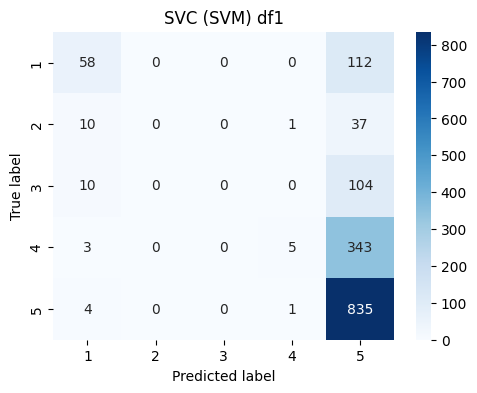

In [5]:
predictor(df1, "df1", .1)

# DataSet2 Analysis

Review_text    object
Rating          int64
dtype: object
dfToUse_Name: df2
dfToUse records: 505,207
Review_text    object
Rating          int64
dtype: object
scaleFrac: 0.01
dfToUse records (resized): 5,052
df2
start_time:  2025-04-21 21:52:12.731541
end_time:    2025-04-21 21:52:17.835096
Duration: 0:00:05.103555
Training Accuracy: 0.8316178411190288
Training Accuracy: 83.2
Testing Accuracy: 0.7569279493269992
Testing Accuracy: 75.7


c:\Users\JoeAtHome\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: [0.         0.         1.         0.         0.75673534]
   Precision: 0.0000
   Precision: 0.0000
   Precision: 100.0000
   Precision: 0.0000
   Precision: 75.6735
Recall: [0.         0.         0.01388889 0.         1.        ]
   Recall: 0.0000
   Recall: 0.0000
   Recall: 100.0000
   Recall: 0.0000
   Recall: 75.6735
F1: [0.         0.         0.02739726 0.         0.86152458]
   F1 0.0000
   F1 0.0000
   F1 2.7397
   F1 0.0000
   F1 86.1525
confusion matrix shape
(5, 5)


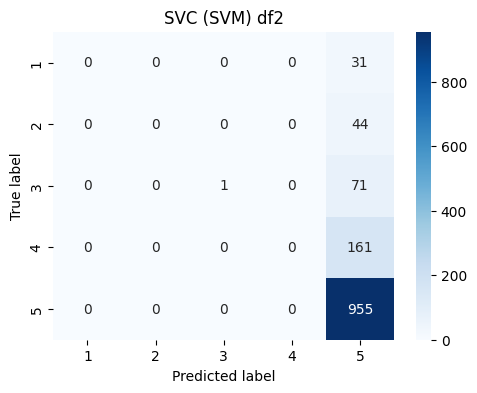

In [6]:
predictor(df2, "df2", .01)

# DataSet3 Analysis

Review_text     object
Rating         float64
dtype: object
dfToUse_Name: df3
dfToUse records: 4,915
Review_text     object
Rating         float64
dtype: object
scaleFrac: 1.0
dfToUse records (resized): 4,915
df3
start_time:  2025-04-21 21:54:39.482865
end_time:    2025-04-21 21:54:46.784487
Duration: 0:00:07.301622
Training Accuracy: 0.8724905046120456
Training Accuracy: 87.2
Testing Accuracy: 0.790073230268511
Testing Accuracy: 79.0


c:\Users\JoeAtHome\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: [0.         0.         0.         0.         0.79007323]
   Precision: 0.0000
   Precision: 0.0000
   Precision: 0.0000
   Precision: 0.0000
   Precision: 79.0073
Recall: [0. 0. 0. 0. 1.]
   Recall: 0.0000
   Recall: 0.0000
   Recall: 0.0000
   Recall: 0.0000
   Recall: 79.0073
F1: [0.         0.         0.         0.         0.88272727]
   F1 0.0000
   F1 0.0000
   F1 0.0000
   F1 0.0000
   F1 88.2727
confusion matrix shape
(5, 5)


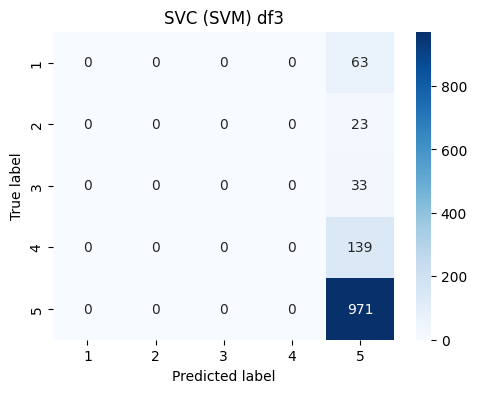

In [7]:
predictor(df3, "df3", 1.0)

# DataSet4 Analysis

Review_text    object
Rating          int64
dtype: object
dfToUse_Name: df4
dfToUse records: 701,528
Review_text    object
Rating          int64
dtype: object
scaleFrac: 0.01
dfToUse records (resized): 7,015
df4
start_time:  2025-04-21 22:10:38.364473
end_time:    2025-04-21 22:10:49.600432
Duration: 0:00:11.235959
Training Accuracy: 0.7770385858201863
Training Accuracy: 77.7
Testing Accuracy: 0.6328392246294184
Testing Accuracy: 63.3


c:\Users\JoeAtHome\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: [0.68181818 0.         0.         0.         0.63063063]
   Precision: 68.1818
   Precision: 0.0000
   Precision: 0.0000
   Precision: 0.0000
   Precision: 63.0631
Recall: [0.24096386 0.         0.         0.         0.99243856]
   Recall: 68.1818
   Recall: 0.0000
   Recall: 0.0000
   Recall: 0.0000
   Recall: 63.0631
F1: [0.35608309 0.         0.         0.         0.77120823]
   F1 35.6083
   F1 0.0000
   F1 0.0000
   F1 0.0000
   F1 77.1208
confusion matrix shape
(5, 5)


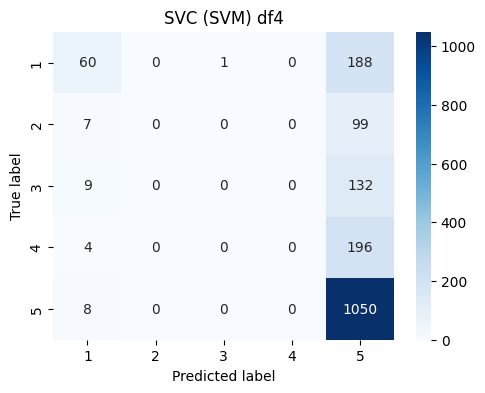

In [6]:
predictor(df4, "df4", .01)